In [81]:
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
import statsmodels.api as sm

In [83]:
#读取200个CSV文件里的内容并拼接成一个表
current_directory = Path.cwd()
folder_hotmusics = current_directory/'comments_files'#文件夹名
folder_filenames = os.listdir(folder_hotmusics)#文件夹里所有文件的名字
folder_csvfiles = []#筛选出所有的CSV文件
for filename in folder_filenames:
    if filename.endswith('.csv'):
        folder_csvfiles.append(filename)
times=pd.DataFrame()
for i in range(len(folder_csvfiles)):
    f = open(current_directory/'comments_files'/folder_csvfiles[i],'rb')
    temp = pd.read_csv(f,usecols = [2,3,4])
    times=pd.concat([times,temp],axis=0)#把读取出来的内容拼接成一个dataframe
times.columns=['like','time','id']
times.index = range(len(times['time']))
times

,like,time,id
0,16万,2月16日 10:51,88991
1,13.8万,3月12日 15:27,88991
2,61680,2月14日 18:10,88991
3,37306,2月14日 18:21,88991
4,35180,2月28日 16:40,88991
5,26098,4月21日 00:02,88991
6,16021,2月27日 10:57,88991
7,14924,2月27日 10:01,88991
8,14319,2月27日 08:43,88991
9,13325,5月2日 12:16,88991


In [84]:
#如果日期里面没有“年”字，则给日期前面加上字段“2020年”
dic = {'年'}
for i in range(len(times['time'])):
    if dic.issubset(times['time'][i]):
        pass
    else:
        times['time'][i] = '2020年'+times['time'][i]
times

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,like,time,id
0,16万,2020年2月16日 10:51,88991
1,13.8万,2020年3月12日 15:27,88991
2,61680,2020年2月14日 18:10,88991
3,37306,2020年2月14日 18:21,88991
4,35180,2020年2月28日 16:40,88991
5,26098,2020年4月21日 00:02,88991
6,16021,2020年2月27日 10:57,88991
7,14924,2020年2月27日 10:01,88991
8,14319,2020年2月27日 08:43,88991
9,13325,2020年5月2日 12:16,88991


In [85]:
#查看所有的年份
times['year'] = [x[0:4] for x in times['time']]
times['year'].unique()

array(['2020', '2017', '2019', '2018', '2015', '2016', '2014'],
      dtype=object)

In [86]:
#查看各个年份的热评数量
distribution =times['year'].groupby(times['year']).count()
distribution

year
2014      41
2015      78
2016     144
2017     167
2018     418
2019     763
2020    1284
Name: year, dtype: int64

<BarContainer object of 7 artists>

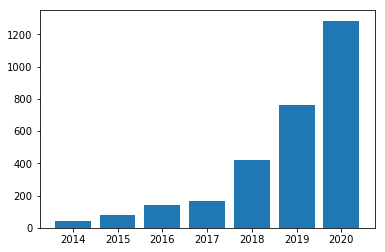

In [87]:
plt.bar(distribution.index,distribution)